In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

train_path = "TRAIN"
test_path ="TEST"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# visualization
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path +'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append((img_array))
        y_data.append(category.split('\\')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:03<00:00, 3314.56it/s]


In [3]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x1d733153f80>,
 [Text(-1.131700766397965, -0.20433642684127334, 'Organic'),
  Text(1.1317007485343022, 0.20433652577769967, 'Recyclable')],
 [Text(-0.6396569549205888, -0.11549450212767623, '55.69%'),
  Text(0.6396569448237359, 0.11549455804826503, '44.31%')])

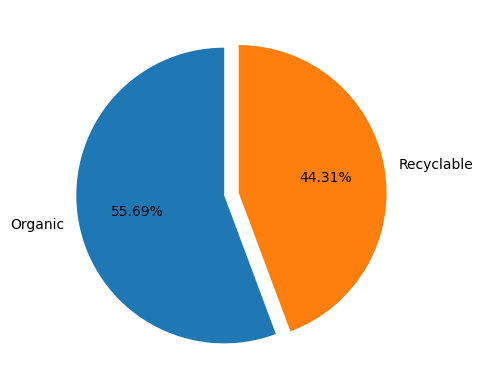

In [4]:
color = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%', startangle = 90, explode=[0.05,0.05])

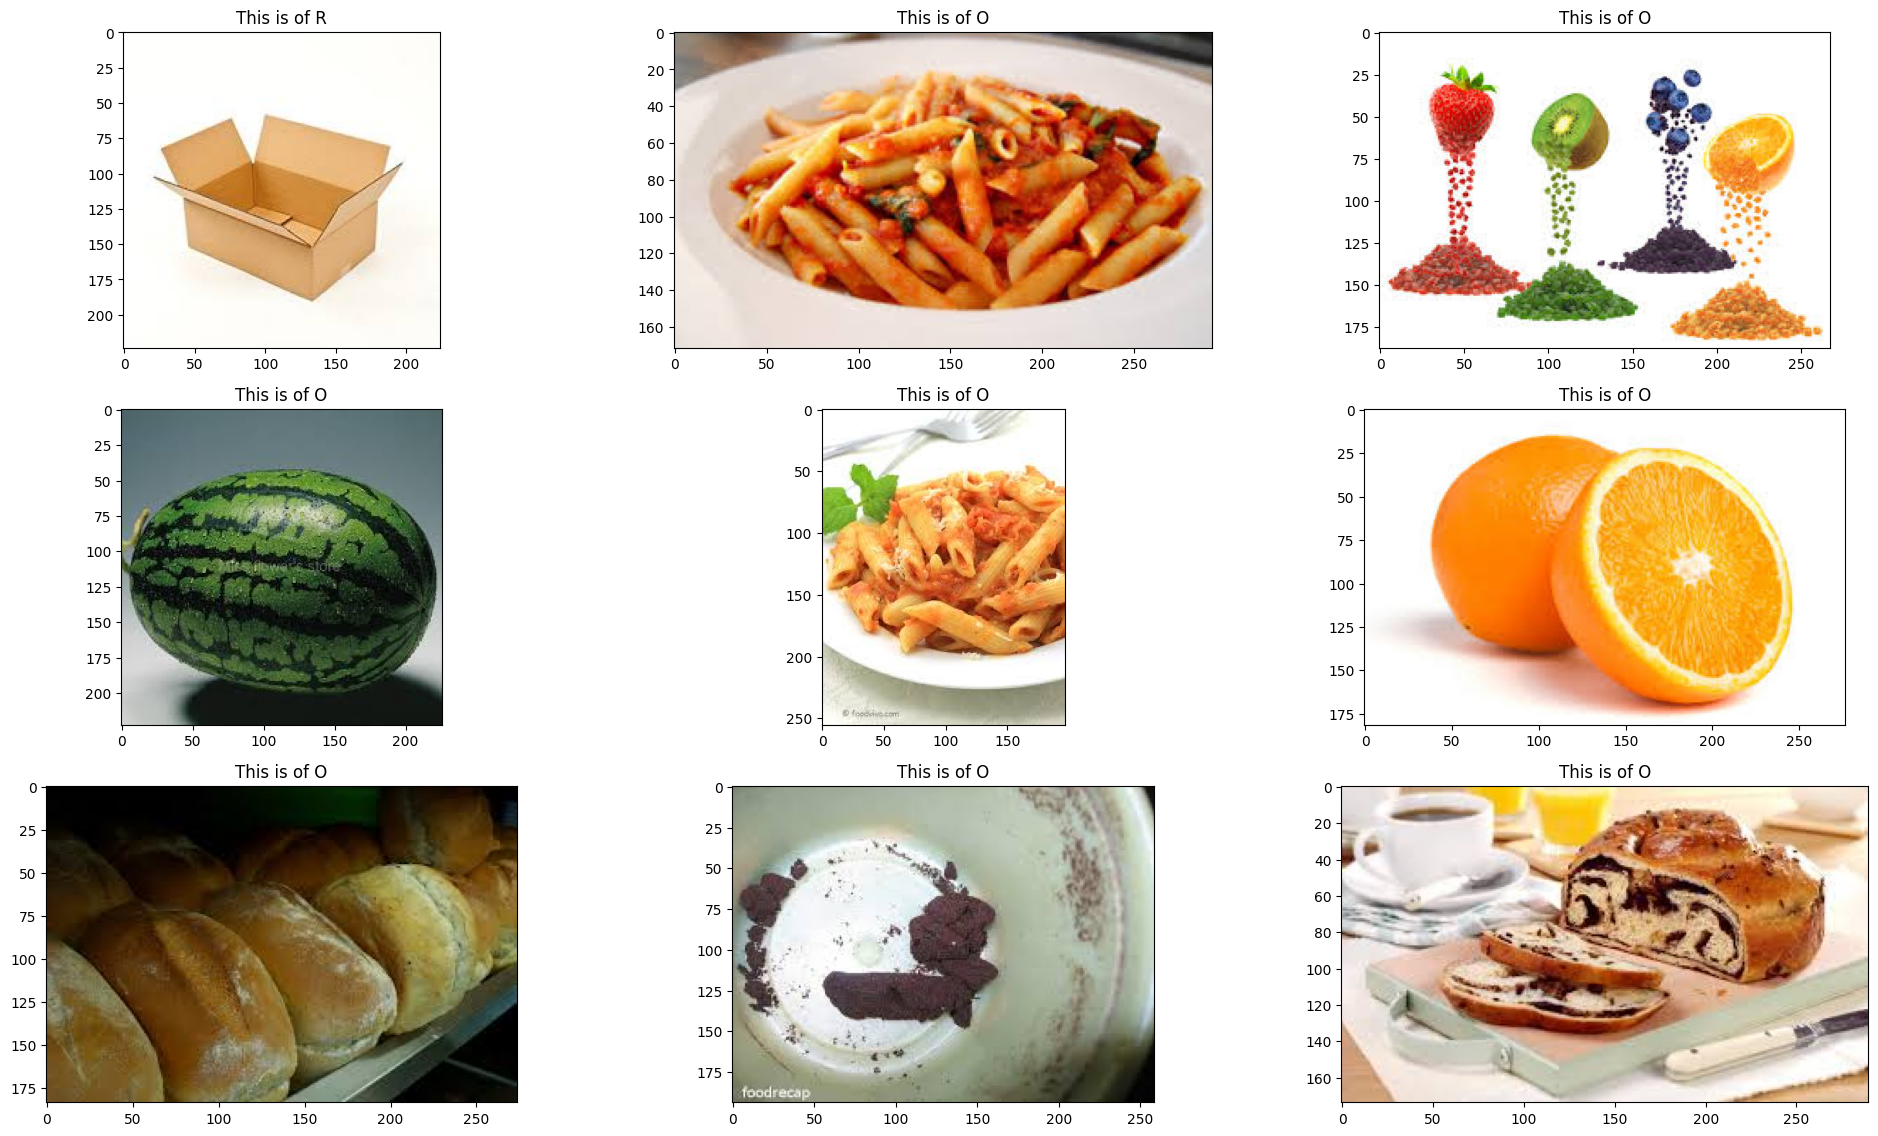

In [5]:
#to train

plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [6]:
## CNN Classifications - Convolution neural network


model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=256




In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255)


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator =train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")
    





Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.8598 - loss: 0.3498 - val_accuracy: 0.8806 - val_loss: 0.2927
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8715 - loss: 0.3251 - val_accuracy: 0.8886 - val_loss: 0.2854
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.8792 - loss: 0.3067 - val_accuracy: 0.8997 - val_loss: 0.2751
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.8812 - loss: 0.2944 - val_accuracy: 0.8758 - val_loss: 0.3108
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9032 - loss: 0.2541 - val_accuracy: 0.8862 - val_loss: 0.3171
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.9071 - loss: 0.2361 - val_accuracy: 0.9109 - val_loss: 0.2731
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9240 - loss: 0.1945 - val_accuracy: 0.8934 - val_loss: 0.3049
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9362 - loss: 0.1699 - val_accuracy: 0.9045 - v

In [14]:
model.save('plastic_waste_classification_model.keras')

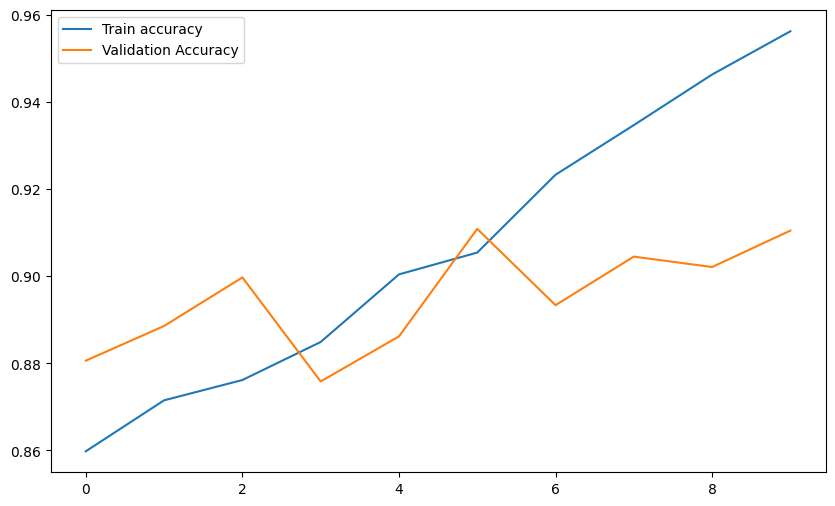

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

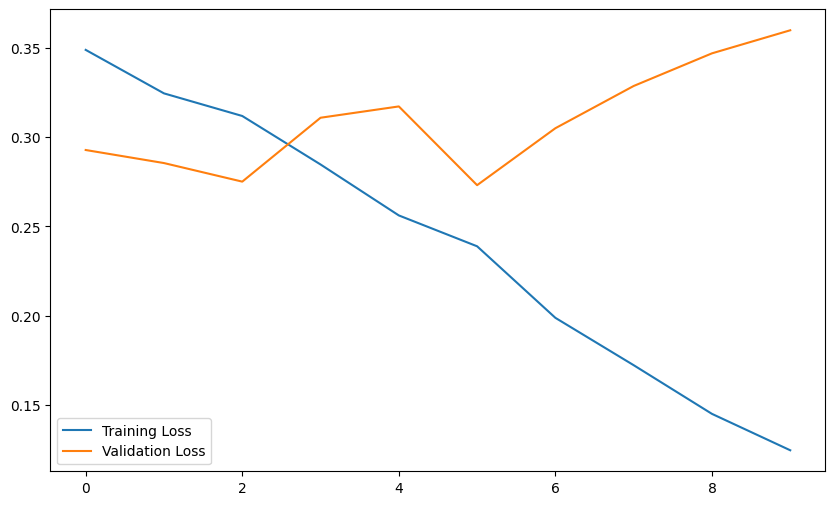

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show

In [32]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img=cv2.resize(img,(224,224))
    img=np.reshape(img,[-1,224,224,3])
    result=np.argmax(model.predict(img))
    if result== 0:
        print('The image shown is Recyclable waste')
    elif result == 1:
        print('The image shown is Organic waste')
        
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image shown is Organic waste


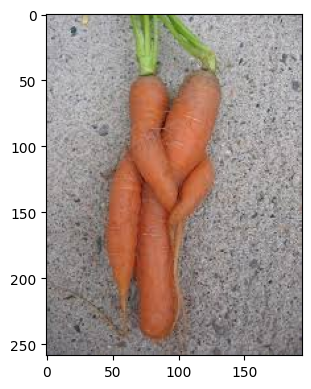

In [37]:
test_img = cv2.imread('TRAIN/O/O_12550.jpg')
predict_fun(test_img)

In [38]:
model.save('plastic_waste_classification_model.keras')